# Supervised Insurance Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pickle



In [2]:
data_path = r'C:\Iqbal\Project\mle_kubernetes\src\insurance.csv'
df = pd.read_csv(data_path, delimiter=',')

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
for col in df.columns:
    unique_col = df[col].unique()
    print(f"Column Name: {col} - unique val: {unique_col}")

Column Name: age - unique val: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Column Name: sex - unique val: ['female' 'male']
Column Name: bmi - unique val: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.0

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)

In [26]:
X_train.shape

(1070, 11)

In [6]:
print(X_train.shape)


(1070, 11)


In [19]:
X_train.shape

(1070, 11)

In [15]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(loss = 'mae',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])


In [16]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13614.7402 - mae: 13614.7402 - val_loss: 12679.5801 - val_mae: 12679.5801
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12731.7686 - mae: 12731.7686 - val_loss: 10128.3682 - val_mae: 10128.3682
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9357.4238 - mae: 9357.4238 - val_loss: 7891.1289 - val_mae: 7891.1289
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7357.0752 - mae: 7357.0752 - val_loss: 6743.2441 - val_mae: 6743.2441
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6208.2427 - mae: 6208.2427 - val_loss: 5568.6255 - val_mae: 5568.6255
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5494.2759 - mae: 5494.2759 - val_loss: 4801.2461 - val_mae: 4801.2461
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4517.6323 - mae: 4517.6323 - val_loss: 3910.8010 - val_mae: 3910.8010
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3791.0786 - mae: 3791.0786 - v

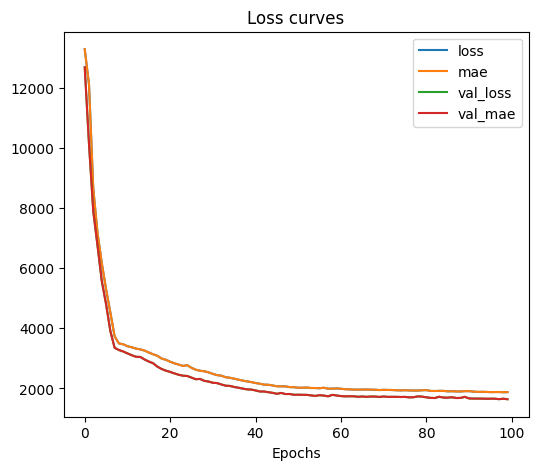

In [19]:
result = pd.DataFrame(history.history)
result.plot(figsize=(6,5))
plt.xlabel("Epochs")
plt.title('Loss curves')
plt.legend();


In [20]:
result

,loss,mae,val_loss,val_mae
0,13280.143555,13280.143555,12679.580078,12679.580078
1,12106.362305,12106.362305,10128.368164,10128.368164
2,8641.725586,8641.725586,7891.128906,7891.128906
3,7170.001465,7170.001465,6743.244141,6743.244141
4,6167.093750,6167.093750,5568.625488,5568.625488
...,...,...,...,...
95,1879.501953,1879.501953,1659.737183,1659.737183
96,1880.610840,1880.610840,1660.558594,1660.558594
97,1882.306030,1882.306030,1644.625732,1644.625732
98,1876.116821,1876.116821,1658.821655,1658.821655


In [18]:
model.save('model_tf.h5')

## Using GCP Vertex AI

In [6]:
from google.cloud import aiplatform
from google.oauth2 import service_account

In [12]:
credentials = service_account.Credentials.from_service_account_file(r'C:\Iqbal\Project\mle_kubernetes\ml-kubernetes-448516-02f02e50f6ea.json')

aiplatform.init(project='ml-kubernetes-448516', credentials=credentials)

In [13]:
aiplatform.TabularDataset.list()

[]

In [14]:
import kfp